# Homework 8: Regression

# Aliza Rafique (ar05986)

# ar06986@st.habib.edu.pk

## Necessary imports

In [2]:
import pandas as pd
import numpy as np
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
df = pd.read_csv("EmployeeSalaryRegression.csv")
df

,Age,Department,DistanceFromHome,Education,EducationField,Gender,HourlyRate,JobLevel,JobRole,MaritalStatus,...,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,MonthlyIncome
0,41,Sales,1,2,Life Sciences,Female,94,2,Sales Executive,Single,...,3,0,8,0,1,6,4,0,5,5993
1,49,Research & Development,8,1,Life Sciences,Male,61,2,Research Scientist,Married,...,4,1,10,3,3,10,7,1,7,5130
2,37,Research & Development,2,2,Other,Male,92,1,Laboratory Technician,Single,...,3,0,7,3,3,0,0,0,0,2090
3,33,Research & Development,3,4,Life Sciences,Female,56,1,Research Scientist,Married,...,3,0,8,3,3,8,7,3,0,2909
4,27,Research & Development,2,1,Medical,Male,40,1,Laboratory Technician,Married,...,3,1,6,3,3,2,2,2,2,3468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,2,Medical,Male,41,2,Laboratory Technician,Married,...,3,1,17,3,3,5,2,0,3,2571
1466,39,Research & Development,6,1,Medical,Male,42,3,Healthcare Representative,Married,...,3,1,9,5,3,7,7,1,7,9991
1467,27,Research & Development,4,3,Life Sciences,Male,87,2,Manufacturing Director,Married,...,4,1,6,0,3,6,2,0,3,6142
1468,49,Sales,2,3,Medical,Male,63,2,Sales Executive,Married,...,3,0,17,3,2,9,6,0,8,5390


## Question 1

#### Monthly Income against Total Working Years

In [4]:
X = df.drop(['MonthlyIncome'],axis=1)
Y = df['MonthlyIncome']

In [5]:
model = sm.OLS(Y,sm.add_constant(X['TotalWorkingYears'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 14 Mar 2022   Prob (F-statistic):          2.73e-292
Time:                        22:47:08   Log-Likelihood:                -13848.
No. Observations:                1470   AIC:                         2.770e+04
Df Residuals:                    1468   BIC:                         2.771e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1227.9353    137.299      8.944      0.000     958.612    1497.259
TotalWorkingYears   467.6584     10.021     46.669      0.000     448.002     487.315
==============================================================================
Omnibus:                       47.473   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.304
Skew:                           0.269   Prob(JB):                     6.02e-18
Kurtosis:                       4.003   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explanation

The value of p is 0.000, a lot less than 0.05 which indicates that the correlation between total working years and monthly income exists and is strong. Practically, it means that for every 1 year increase in the working years, the monthly income increases by 467.65. Without even any working years, an employee gets approximatly 1228. 

### Visualization

C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'Monthly Income')

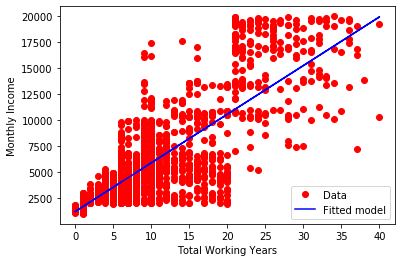

In [6]:
plt.plot(df['TotalWorkingYears'],df['MonthlyIncome'],'ro')
plt.plot(df['TotalWorkingYears'],model.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Total Working Years')
plt.ylabel('Monthly Income')

## Question 2

#### Distance from home against Age

In [7]:
X = df.drop(['DistanceFromHome'],axis=1)
Y = df['DistanceFromHome']

In [8]:
model = sm.OLS(Y,sm.add_constant(X['Age'])).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                  0.004174
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.948
Time:                        22:47:09   Log-Likelihood:                -5161.6
No. Observations:                1470   AIC:                         1.033e+04
Df Residuals:                    1468   BIC:                         1.034e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.2478      0.881     10.497      0.000       7.520      10.976
Age           -0.0015      0.023     -0.065      0.948      -0.047       0.044
==============================================================================
Omnibus:                      168.749   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.762
Skew:                           0.957   Prob(JB):                     3.48e-50
Kurtosis:                       2.773   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explanation

The value for p for this model is very high compared to 0.05 which indicates that the null hypothesis stating that there is no relationship between age and distance from home is accepted. It means that younger or older employees do not preferably choose to stay near or far from the office. We can further see this relationship with the following graph:

### Visualization

C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Haroon\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'DistanceFromHome')

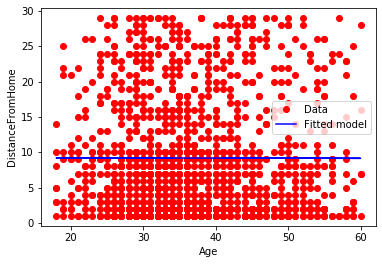

In [9]:
plt.plot(df['Age'],df['DistanceFromHome'],'ro')
plt.plot(df['Age'],model.fittedvalues,  'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Age')
plt.ylabel('DistanceFromHome')

## Question 3

### Q1

The r-squared value for this relationship is 0.597 that corresponds to the correlation value of 0.773 between predictions and actual value of monthly income. This indicates that there is a relationship between total working years and monthly income and this is a precise prediction. We can also use the function to find correlation:

In [10]:
df2 = df[['DistanceFromHome', 'MonthlyIncome', "TotalWorkingYears", "Age"]]
df2.corr()

,DistanceFromHome,MonthlyIncome,TotalWorkingYears,Age
DistanceFromHome,1.000000,-0.017014,0.004628,-0.001686
MonthlyIncome,-0.017014,1.000000,0.772893,0.497855
TotalWorkingYears,0.004628,0.772893,1.000000,0.680381
Age,-0.001686,0.497855,0.680381,1.000000


Here for Q1, the relationship between Monthly income and total working years shows positive correlation value exactly same to the one that we calculated. It also shows that there is a positive correlation between these two variables. 

### Q2

The r-squared value for this relationship is 0.000 corresponding to correlation value of 0.000. This means that there is no relationship between the variables. 

In [11]:
df2 = df[['DistanceFromHome', 'MonthlyIncome', "TotalWorkingYears", "Age"]]
df2.corr()

,DistanceFromHome,MonthlyIncome,TotalWorkingYears,Age
DistanceFromHome,1.000000,-0.017014,0.004628,-0.001686
MonthlyIncome,-0.017014,1.000000,0.772893,0.497855
TotalWorkingYears,0.004628,0.772893,1.000000,0.680381
Age,-0.001686,0.497855,0.680381,1.000000


The correlation value is very weak thus indicating no some to none relationship.

## One hot encoding to be used in the later questions. 
One hot encoding neeeded to convert categories into numerical data.

In [28]:
def encoding(df, cols):
    one_hot = pd.get_dummies(df, columns=cols)
    return one_hot

## Question 4

### Part 1

In [29]:
cols = ['Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
one_hot = encoding(df, cols)
X = one_hot.drop(['MonthlyIncome'], axis=1)
Y = one_hot['MonthlyIncome']

In [14]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     661.2
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:47:10   Log-Likelihood:                -12389.
No. Observations:                1470   AIC:                         2.485e+04
Df Residuals:                    1432   BIC:                         2.506e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               300.1479    119.803      2.505      0.012      65.140     535.156
Age                                  -4.4277      4.631     -0.956      0.339     -13.513       4.657
DistanceFromHome                     -4.5889      3.643     -1.260      0.208     -11.735       2.557
HourlyRate                            1.4345      1.451      0.989      0.323      -1.411       4.280
JobLevel                           2767.1348     67.758     40.839      0.000    2634.220    2900.050
NumCompaniesWorked                   11.2233     13.225      0.849      0.396     -14.719      37.166
PerformanceRating                   -25.0732     81.703     -0.307      0.759    -185.344     135.198
StockOptionLevel                    -42.9048     47.391     -0.905      0.365    -135.869      50.059
TotalWorkingYears                    47.2463      8.302      5.691      0.000      30.961      63.532
TrainingTimesLastYear               -15.1400     23.104     -0.655      0.512     -60.462      30.182
WorkLifeBalance                     -22.8015     41.963     -0.543      0.587    -105.117      59.514
YearsAtCompany                        6.0221     10.389      0.580      0.562     -14.357      26.401
YearsInCurrentRole                    0.2450     13.469      0.018      0.985     -26.177      26.667
YearsSinceLastPromotion              23.4739     11.854      1.980      0.048       0.221      46.727
YearsWithCurrManager                -32.8938     13.768     -2.389      0.017     -59.901      -5.887
Department_Human Resources          -20.4541    275.386     -0.074      0.941    -560.658     519.750
Department_Research & Development   237.4587    170.099      1.396      0.163     -96.210     571.128
Department_Sales                     83.1433    186.008      0.447      0.655    -281.733     448.020
Education_1                         244.8780     82.838      2.956      0.003      82.381     407.375
Education_2                         -53.1548     70.739     -0.751      0.453    -191.918      85.609
Education_3                         107.2230     58.367      1.837      0.066      -7.270     221.716
Education_4                         124.3094     65.243      1.905      0.057      -3.672     252.291
Education_5                        -123.1077    138.764     -0.887      0.375    -395.311     149.096
EducationField_Human Resources       86.0188    242.451      0.355      0.723    -389.578     561.616
EducationField_Life Sciences         31.1171     72.007      0.432      0.666    -110.133     172.368
EducationField_Marketing             94.1579    109.742      0.858      0.391    -121.114     309.430
EducationField_Medical               24.8709     75.870      0.328      0.743    -123.958     173.699
EducationField_Other   

### Explanation

The r-squared value is 0.945 which is a pretty high value indicating that the model is good. The corresponding correlation is 0.972 between predicted and actual monthly incomes.
The three most significant inputs are job level, total working years, and job role. For job level and total working years, the p-value is 0.000 and for most categories of job role the p value is 0.000 thus indicating that there is a relationship of all three with monthly income and a strong one. For example, for job level, with every one unit increase in job level, the monthly income increases approximately by 2767. Similarly, with every one year increase in total working years the monthly income increases by approximately 47. For job role, since for most of the categories the p-value is 0.000 and for others it is less than 0.05 it shows that the monthly income depends on what kind of role do you have in the company. With different roles, the monthly income changes and that of course depends on the nature of the company as well. The three lowest signficant inputs are age, years in current role, and department human resources. For all three, the p-value is high a lot more than 0.05 indicating there is no relationship between these inputs and the monthly income. Or we can say that the monthly income does not depend on these quantities. 

### Part 2

### Creating new row

In [15]:
X = one_hot.drop(["MonthlyIncome"], axis=1)
Y = one_hot["MonthlyIncome"]
X = sm.add_constant(X)

actual = float(one_hot.tail(1)['MonthlyIncome'])
predicted = float(modelall.predict(X.tail(1)))

### Prediction Code

In [16]:
# newX = [23, 'Sales', 27, 3, "Life Sciences", "Female", 84, 3, 'Research Scientist', "Single", 6, 'Yes', 4, 1, 18, 0, 3, 11, 5, 1, 3, 5379]
newX = [
    1, 2,24,100,1,1,3,2,0,1,2,1,0,1,0,1,1,0,0,1,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0
]

newdf = pd.DataFrame([newX], columns=X.columns.to_list())
modelall.predict(newdf)

0    1676.132856
dtype: float64

### Explanation

The predicted monthly income from the above model is 1676. This includes adding an entry with random values.

## Question 5

### Part 1

In [30]:
cols = ['Department', 'Education', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
one_hot = encoding(df, cols)
X = one_hot.drop(['HourlyRate'], axis=1)
Y = one_hot['HourlyRate']

In [18]:
modelall = sm.OLS(Y,sm.add_constant(X)).fit()
modelall.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             HourlyRate   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.6561
Date:                Mon, 14 Mar 2022   Prob (F-statistic):              0.945
Time:                        22:47:11   Log-Likelihood:                -6500.7
No. Observations:                1470   AIC:                         1.308e+04
Df Residuals:                    1432   BIC:                         1.328e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                20.8458      2.116      9.853      0.000      16.696      24.996
Age                                   0.0614      0.084      0.728      0.467      -0.104       0.227
DistanceFromHome                      0.0781      0.066      1.178      0.239      -0.052       0.208
JobLevel                             -3.3206      1.813     -1.831      0.067      -6.877       0.236
NumCompaniesWorked                    0.1133      0.241      0.471      0.638      -0.359       0.586
PerformanceRating                    -0.3599      1.488     -0.242      0.809      -3.278       2.559
StockOptionLevel                      1.4168      0.862      1.643      0.101      -0.275       3.108
TotalWorkingYears                     0.0508      0.153      0.333      0.740      -0.249       0.351
TrainingTimesLastYear                -0.0985      0.421     -0.234      0.815      -0.924       0.727
WorkLifeBalance                       0.1105      0.764      0.145      0.885      -1.389       1.610
YearsAtCompany                        0.0490      0.189      0.259      0.796      -0.322       0.420
YearsInCurrentRole                   -0.1083      0.245     -0.442      0.659      -0.589       0.373
YearsSinceLastPromotion              -0.1702      0.216     -0.788      0.431      -0.594       0.254
YearsWithCurrManager                 -0.0103      0.251     -0.041      0.967      -0.503       0.482
MonthlyIncome                         0.0005      0.000      0.989      0.323      -0.000       0.001
Department_Human Resources            7.5879      5.011      1.514      0.130      -2.241      17.417
Department_Research & Development     5.9308      3.095      1.916      0.056      -0.141      12.003
Department_Sales                      7.3271      3.382      2.167      0.030       0.693      13.961
Education_1                           3.0402      1.511      2.012      0.044       0.076       6.004
Education_2                           4.1731      1.284      3.251      0.001       1.655       6.691
Education_3                           3.5733      1.060      3.371      0.001       1.494       5.652
Education_4                           3.6161      1.186      3.050      0.002       1.290       5.942
Education_5                           6.4431      2.522      2.555      0.011       1.496      11.390
EducationField_Human Resources       -1.7358      4.415     -0.393      0.694     -10.396       6.924
EducationField_Life Sciences          5.7845      1.302      4.442      0.000       3.230       8.339
EducationField_Marketing              5.4838      1.994      2.751      0.006       1.573       9.394
EducationField_Medical                4.0666      1.377      2.952      0.003       1.365       6.768
EducationField_Other   

### Explanation

The r-squared value for this model is 0.017 indicating that the model is not good enough. However, the three most significant relationships are gender, overtime, and marital status. For all the categories of these columns, the p-value is 0.000 suggesting a relationship of these columns with hourly rate. For gender, this p-value is a bit strange but it means that the gender of an employee does determine their hourly rate. For overtime, it means that the time you spent on your job impacts your hourly rate. For marital status as well, it means that for married couples or singles their hourly rate differs. The three least significant relationships are years with current manager, work-life balance, and training times last year. For all these columns, the p-value is the highest and greater than 0.05 indicating that they do not impact the hourly rate of an employee. Possibly because hourly rate is decided by the management and even with employees having work-life balance or trainings, their performance might improve but not their hourly rate. 

In [23]:
'''Not part of assignment submission'''
# sns.barplot(data=df, x='Gender', y='HourlyRate')
# question: why is the p-value of gender for both 0.000 but the graph is showing that 
# hourly rate is the same for both? Doesn't p-value checks whether our data provides enough 
# evidence that a relationship exists?

'Not part of assignment submission'

### Part 2

### Creating a new row

In [24]:
X = one_hot.drop(["MonthlyIncome"], axis=1)
Y = one_hot["MonthlyIncome"]
X = sm.add_constant(X)

actual = float(one_hot.tail(1)['MonthlyIncome'])
predicted = float(modelall.predict(X.tail(1)))

### Prediction Code

In [25]:
newX = [
    1, 2,12,23,1,1,3,2,0,1,2,1,1,0,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,1,1
]

newdf = pd.DataFrame([newX], columns=X.columns.to_list())
modelall.predict(newdf)

0    39.933366
dtype: float64

### Explanation

The value of hourly rate predicted by the model is approximately 40. This include the new record in the data as well.

## Question 6

In [41]:
# years since last promotion, job level, total working years
df3 = df.loc[:, df.columns.intersection(['JobRole','JobLevel', 'TotalWorkingYears', "MonthlyIncome"])]
cols = ['JobLevel', 'TotalWorkingYears', 'JobRole']
one_hot = encoding(df3, cols)
X = one_hot.drop(['MonthlyIncome'], axis=1)
Y = one_hot['MonthlyIncome']

model = sm.OLS(Y,sm.add_constant(X)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          MonthlyIncome   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     556.4
Date:                Mon, 14 Mar 2022   Prob (F-statistic):               0.00
Time:                        23:13:00   Log-Likelihood:                -12287.
No. Observations:                1471   AIC:                         2.468e+04
Df Residuals:                    1419   BIC:                         2.495e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              8.961e+13    7.3e+15      0.012      0.990   -1.42e+16    1.44e+16
JobLevel_1                        -1.068e+14    8.7e+15     -0.012      0.990   -1.72e+16     1.7e+16
JobLevel_2                        -1.068e+14    8.7e+15     -0.012      0.990   -1.72e+16     1.7e+16
JobLevel_3                        -1.068e+14    8.7e+15     -0.012      0.990   -1.72e+16     1.7e+16
JobLevel_4                        -1.068e+14    8.7e+15     -0.012      0.990   -1.72e+16     1.7e+16
JobLevel_5                        -1.068e+14    8.7e+15     -0.012      0.990   -1.72e+16     1.7e+16
TotalWorkingYears_0                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_1                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_2                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_3                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_4                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_5                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_6                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_7                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_8                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_9                8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_10               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_11               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_12               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_13               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_14               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_15               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_16               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_17               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_18               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_19               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_20               8.594e+12      7e+14      0.012      0.990   -1.37e+15    1.38e+15
TotalWorkingYears_21   

### Explanation

The model has an r-squared value of 0.952 as opposed to the r-square value in Q4 of 0.945. The model is better and the reason is because these three columns are the ones impacting the monthly income the most so the overall prediction of the monthly income in regression doesn't decrease or change a lot. Monthly income is mostly dependent on these variables. In terms of perference, I believe we do need a model containing all the variables so that we can get the bigger picture of the relationships but after then, we can use this model to further study the significant relationships. 

# End of Assignment